# Predictions Report

This notebook creates a report of the predictions made by the models.


## Typical Workflow

Naive predictions are quite empty - each Success Metric has a value of 0.0,
except for the overall success metric.

KNN predictions are more interesting - each Success Metric has a value between
1.0 and 5.0. **This is model we are using.** 

### Input Data

In [1]:
# The input from the front end would be a JSON object with the following format.
# The one below is formatted for readability, but this does not matter.
json_csfs = """{
    "OF.01": 1, "OF.02": 2, "OF.03": 3, "OF.04": 4, "OF.05": 1, "OF.06": 5,
    "TF.01": 2, "TF.02": 5, "TF.03": 3, "TF.04": 5, "TF.05": 5, "TF.06": 4, "TF.07": 2,
    "CF.01": 1, "CF.02": 3, "CF.03": 3, "CF.04": 2,
    "PF.01": 3, "PF.02": 3, "PF.03": 1, "PF.04": 2, "PF.05": 4, "PF.06": 4, "PF.07": 4
}"""

### Using the Models

In [2]:
import json

from predictions.trainer import Trainer
from predictions.model_knn import ModelKNN
from predictions.model_naive import ModelNaive
from predictions.utils import to_json_success_metrics

# Trainer class is used to train only the KNN model right now.
trainer = Trainer(seed=415324)

# We need to convert the JSON string into a dictionary. We can use this as input
# into our models.
csfs = json.loads(json_csfs)

# -------------------------
# ------ Naive Model ------
# -------------------------
naive = ModelNaive()
naive_prediction = naive.predict(csfs)

json_naive_prediction = to_json_success_metrics(naive_prediction)

# ----------------------------------------
# ------ K-Nearest Neighbours Model ------
# ----------------------------------------
# K-Nearest Neighbours model needs to be trained. The simplest way to do this is
# to use the Trainer class.
knn = ModelKNN()
trainer.train_model(knn)
knn_prediction = knn.predict(csfs)

json_knn_prediction = to_json_success_metrics(knn_prediction)


### JSON Output

In [3]:
print("Naive predictions:")
print(json_naive_prediction)

Naive predictions:
{
    "budget": 0.0,
    "schedule": 0.0,
    "scope": 0.0,
    "team_building_and_dynamics": 0.0,
    "overall_quality": 0.0,
    "business_and_revenue_generated": 0.0,
    "functional_suitability": 0.0,
    "reliability": 0.0,
    "performance_efficiency": 0.0,
    "operability": 0.0,
    "security": 0.0,
    "compatibility": 0.0,
    "maintainability": 0.0,
    "transferability": 0.0,
    "user_satisfaction": 0.0,
    "team_satisfaction": 0.0,
    "top_management_satisfaction": 0.0,
    "overall_success": 3.3020134228187916
}


In [4]:
print("KNN predictions:")
print(json_knn_prediction)

KNN predictions:
{
    "budget": 4.0,
    "schedule": 1.0,
    "scope": 5.0,
    "team_building_and_dynamics": 4.0,
    "overall_quality": 4.0,
    "business_and_revenue_generated": 4.0,
    "functional_suitability": 4.0,
    "reliability": 4.0,
    "performance_efficiency": 3.0,
    "operability": 4.0,
    "security": 3.0,
    "compatibility": 4.0,
    "maintainability": 3.0,
    "transferability": 3.0,
    "user_satisfaction": 4.0,
    "team_satisfaction": 3.0,
    "top_management_satisfaction": 4.0,
    "overall_success": 3.588235294117647
}


## Model Comparison

We aim to compare a random model, a naive model, and a KNN model.

We have the test data in `trainer.test_x` and `trainer.test_y`. These follow the
order of `ALL_CSFS` and `ALL_SUCCESS_METRICS`.

We use these, to calculate the accuracy of the models on unseen data -
effectively calculating how well the models generalise.

In [5]:
from predictions.critical_success_factors import ALL_CSFS
from predictions.success_metrics import ALL_SUCCESS_METRICS

In [6]:
print("Test Inputs:")
print(f"Shape: {trainer.test_x.shape}, len of ALL_CSFS: {len(ALL_CSFS)}")
print(trainer.test_x)

Test Inputs:
Shape: (31, 24), len of ALL_CSFS: 24
[[4 2 2 4 4 2 4 4 2 4 4 4 4 5 5 4 5 2 3 5 5 4 5 2]
 [3 5 3 3 3 3 4 3 4 5 4 4 3 5 5 3 4 4 4 4 3 4 4 3]
 [3 2 4 2 3 3 4 4 2 2 2 3 4 4 4 3 4 2 3 5 2 3 4 4]
 [1 3 1 3 2 3 3 3 3 2 4 4 4 3 3 4 4 5 3 5 1 3 3 3]
 [2 4 2 4 3 3 4 4 3 3 3 3 4 1 1 2 3 2 2 1 1 4 2 3]
 [4 3 3 5 3 4 4 2 3 1 3 3 3 3 3 2 3 3 3 4 3 4 3 2]
 [3 3 3 5 4 3 4 4 2 3 4 4 3 3 3 2 4 2 4 3 3 3 5 1]
 [4 4 5 4 4 5 5 5 5 5 5 4 5 5 5 4 5 4 4 5 3 3 5 2]
 [4 4 4 4 4 5 5 5 3 3 4 4 4 4 3 3 4 2 4 2 3 4 3 4]
 [5 5 3 3 4 3 4 5 4 3 5 5 5 5 5 5 4 4 4 4 1 4 4 1]
 [1 3 1 2 1 1 2 4 3 1 3 3 2 1 1 1 2 4 4 3 3 4 2 1]
 [5 5 4 4 4 2 5 5 5 3 3 1 3 5 5 3 3 3 3 3 2 3 2 2]
 [2 5 3 3 2 3 4 4 3 4 3 3 3 3 4 4 4 3 5 4 3 4 4 1]
 [5 4 5 3 4 3 4 4 4 3 4 4 4 3 3 3 4 4 3 4 3 3 2 3]
 [4 3 4 5 4 5 4 4 4 3 3 4 4 4 4 4 5 3 3 2 1 3 2 4]
 [2 3 1 4 2 1 1 3 2 2 4 3 2 1 5 1 1 3 4 5 5 5 4 1]
 [3 1 5 4 4 5 4 5 4 5 5 5 5 4 4 4 5 3 4 4 2 3 4 1]
 [2 3 3 3 3 3 3 3 3 2 3 3 3 2 4 2 2 2 3 3 3 3 4 2]
 [2 1 5 5 4 4 4 4 3 4 4 4 4 3 4 

In [7]:
print("Test Outputs:")
print(f"Shape: {trainer.test_y.shape}, len of ALL_SUCCESS_METRICS: {len(ALL_SUCCESS_METRICS)}")
print(trainer.test_y)

Test Outputs:
Shape: (31, 18), len of ALL_SUCCESS_METRICS: 18
[[5.   5.   5.   4.   4.   5.   5.   5.   4.   4.   5.   4.   5.   4.
  5.   5.   5.   4.65]
 [4.   4.   4.   4.   4.   3.   4.   4.   4.   3.   2.   4.   4.   3.
  4.   4.   4.   3.47]
 [4.   3.   3.   3.   4.   3.   4.   4.   4.   5.   4.   4.   4.   4.
  4.   4.   4.   3.82]
 [4.   4.   4.   4.   3.   4.   4.   4.   4.   4.   3.   4.   5.   5.
  4.   3.   3.   3.88]
 [4.   1.   4.   4.   3.   4.   3.   3.   2.   4.   4.   4.   2.   3.
  4.   4.   4.   2.24]
 [3.   5.   3.   4.   4.   5.   4.   4.   4.   4.   3.   3.   4.   4.
  4.   4.   4.   3.65]
 [4.   2.   5.   4.   4.   4.   4.   4.   3.   5.   1.   4.   3.   1.
  4.   4.   5.   3.59]
 [1.   3.   5.   4.   5.   3.   5.   5.   5.   5.   4.   5.   5.   5.
  4.   5.   4.   4.06]
 [4.   5.   5.   5.   4.   4.   5.   4.   4.   4.   4.   3.   4.   3.
  4.   4.   4.   4.12]
 [2.   3.   4.   5.   4.   4.   4.   4.   4.   4.   4.   4.   4.   4.
  4.   4.   4.   3.88]
 [4.   4

In [8]:
import numpy as np

from predictions.metrics.analyse import Analyser

def error_analysis_per_success_metric(trainer, predictions):
    # reports_per_sm is of the form:
    # {
    #  SuccessMetric: [ { error_metric: value }, { error_metric: value }, ... ],
    #  SuccessMetric: [ { error_metric: value }, { error_metric: value }, ... ],
    #  ...
    # }
    reports_per_sm = {}
    for i, sm in enumerate(ALL_SUCCESS_METRICS):
        report_for_current_sm = []
        for j, prediction in enumerate(predictions):
            report = Analyser.analyse_model(
                predictions=[prediction[i]],
                test_labels=[trainer.test_y[j][i]],
            )
            report_for_current_sm.append(report)

        reports_per_sm[sm] = report_for_current_sm

    # Average for each success metric per key in the report.
    # averages_per_sm is of the form:
    # {
    #  SuccessMetric: { error_metric: value, error_metric: value, ... },
    #  SuccessMetric: { error_metric: value, error_metric: value, ... },
    #  ...
    # }
    averages_per_sm = {}
    for sm, reports in reports_per_sm.items():
        averages_per_sm[sm] = {}
        for report in reports:
            for key, value in report.items():
                if key not in averages_per_sm[sm]:
                    averages_per_sm[sm][key] = []

                averages_per_sm[sm][key].append(value)

    for sm, averages in averages_per_sm.items():
        for key, values in averages.items():
            averages[key] = np.mean(values)

    return averages_per_sm

### Random Predictions

To gauge how well the models are doing, we can compare them to random
predictions. This will do awfully, but it will give us a baseline.

In [9]:
import random
random.seed(42)

from predictions.metrics.analyse import Analyser

# Predict each sample in the test set using the random model.
random_predictions = []
for i in range(31):
    sms = []
    for j in range(18):
        sms.append(random.uniform(1, 5))

    random_predictions.append(sms)

averages_per_sm = error_analysis_per_success_metric(trainer, random_predictions)

print("Averages per success metric:")
for sm, averages in averages_per_sm.items():
    str_builder = f"{sm.name}: \n"
    for key, value in averages.items():
        str_builder += f"\t{key}: {value:.2f}, "

    print(str_builder)

Averages per success metric:
budget: 
	MAE: 1.22, 	MSE: 2.54, 	RMSE: 1.22, 	MAPE: 0.32, 	CUSTOM: 3.10, 
schedule: 
	MAE: 1.63, 	MSE: 3.62, 	RMSE: 1.63, 	MAPE: 0.52, 	CUSTOM: 3.55, 
scope: 
	MAE: 1.53, 	MSE: 3.56, 	RMSE: 1.53, 	MAPE: 0.53, 	CUSTOM: 4.03, 
team_building_and_dynamics: 
	MAE: 1.18, 	MSE: 2.46, 	RMSE: 1.18, 	MAPE: 0.29, 	CUSTOM: 3.03, 
overall_quality: 
	MAE: 1.53, 	MSE: 3.10, 	RMSE: 1.53, 	MAPE: 0.39, 	CUSTOM: 4.19, 
business_and_revenue_generated: 
	MAE: 1.27, 	MSE: 2.16, 	RMSE: 1.27, 	MAPE: 0.38, 	CUSTOM: 3.45, 
functional_suitability: 
	MAE: 1.11, 	MSE: 2.01, 	RMSE: 1.11, 	MAPE: 0.30, 	CUSTOM: 2.94, 
reliability: 
	MAE: 1.33, 	MSE: 2.74, 	RMSE: 1.33, 	MAPE: 0.32, 	CUSTOM: 3.61, 
performance_efficiency: 
	MAE: 1.32, 	MSE: 2.42, 	RMSE: 1.32, 	MAPE: 0.35, 	CUSTOM: 3.00, 
operability: 
	MAE: 1.30, 	MSE: 2.82, 	RMSE: 1.30, 	MAPE: 0.33, 	CUSTOM: 3.48, 
security: 
	MAE: 1.50, 	MSE: 3.11, 	RMSE: 1.50, 	MAPE: 0.47, 	CUSTOM: 3.77, 
compatibility: 
	MAE: 1.07, 	MSE: 1.72, 	RMSE: 1

### KNN Model Analysis

In [10]:
import random
random.seed(42)

from predictions.utils import create_csf_map, extract_success_values

# Predict each sample in the test set using the KNN model.
knn_predictions = []
for x in trainer.test_x:
    # Convert to dict from np array.
    mapping = create_csf_map()
    for csf, value in zip(ALL_CSFS, x):
        mapping[csf] = value

    prediction = knn.predict(mapping)
    prediction = extract_success_values(prediction)

    knn_predictions.append(prediction)

# Analyse the prediction errors per success metric.
averages_per_sm = error_analysis_per_success_metric(trainer, knn_predictions)

print("Averages per success metric:")
for sm, averages in averages_per_sm.items():
    str_builder = f"{sm.name}: \n"
    for key, value in averages.items():
        str_builder += f"\t{key}: {value:.2f}, "

    print(str_builder)

Averages per success metric:
budget: 
	MAE: 0.71, 	MSE: 1.29, 	RMSE: 0.71, 	MAPE: 0.34, 	CUSTOM: 1.06, 
schedule: 
	MAE: 1.23, 	MSE: 2.13, 	RMSE: 1.23, 	MAPE: 0.37, 	CUSTOM: 1.71, 
scope: 
	MAE: 0.84, 	MSE: 1.23, 	RMSE: 0.84, 	MAPE: 0.29, 	CUSTOM: 0.77, 
team_building_and_dynamics: 
	MAE: 0.42, 	MSE: 0.42, 	RMSE: 0.42, 	MAPE: 0.12, 	CUSTOM: 0.00, 
overall_quality: 
	MAE: 0.35, 	MSE: 0.35, 	RMSE: 0.35, 	MAPE: 0.10, 	CUSTOM: 0.00, 
business_and_revenue_generated: 
	MAE: 0.71, 	MSE: 1.23, 	RMSE: 0.71, 	MAPE: 0.37, 	CUSTOM: 0.84, 
functional_suitability: 
	MAE: 0.45, 	MSE: 0.52, 	RMSE: 0.45, 	MAPE: 0.17, 	CUSTOM: 0.13, 
reliability: 
	MAE: 0.45, 	MSE: 0.45, 	RMSE: 0.45, 	MAPE: 0.12, 	CUSTOM: 0.00, 
performance_efficiency: 
	MAE: 0.61, 	MSE: 0.81, 	RMSE: 0.61, 	MAPE: 0.17, 	CUSTOM: 0.39, 
operability: 
	MAE: 0.52, 	MSE: 0.58, 	RMSE: 0.52, 	MAPE: 0.15, 	CUSTOM: 0.13, 
security: 
	MAE: 0.42, 	MSE: 0.55, 	RMSE: 0.42, 	MAPE: 0.18, 	CUSTOM: 0.26, 
compatibility: 
	MAE: 0.45, 	MSE: 0.45, 	RMSE: 0

### Naive Model Analysis

In [11]:
import random
random.seed(42)

from predictions.utils import create_csf_map, extract_success_values

# Predict each sample in the test set using the NAIVE model.
naive_predictions = []
for x in trainer.test_x:
    # Convert to dict from np array.
    mapping = create_csf_map()
    for csf, value in zip(ALL_CSFS, x):
        mapping[csf] = value

    prediction = naive.predict(mapping)
    prediction = extract_success_values(prediction)

    naive_predictions.append(prediction)

# Analyse the prediction errors per success metric.
averages_per_sm = error_analysis_per_success_metric(trainer, naive_predictions)

print("Averages per success metric:")
for sm, averages in averages_per_sm.items():
    if sm.name != "overall_success":
        continue
    str_builder = f"{sm.name}: \n"
    for key, value in averages.items():
        str_builder += f"\t{key}: {value:.2f}, "

    print(str_builder)

Averages per success metric:
overall_success: 
	MAE: 0.47, 	MSE: 0.33, 	RMSE: 0.47, 	MAPE: 0.15, 	CUSTOM: 0.13, 


C:\Users\Jakub\AppData\Local\Temp/ipykernel_5028/3831826625.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(knn_predictions)[:, i],


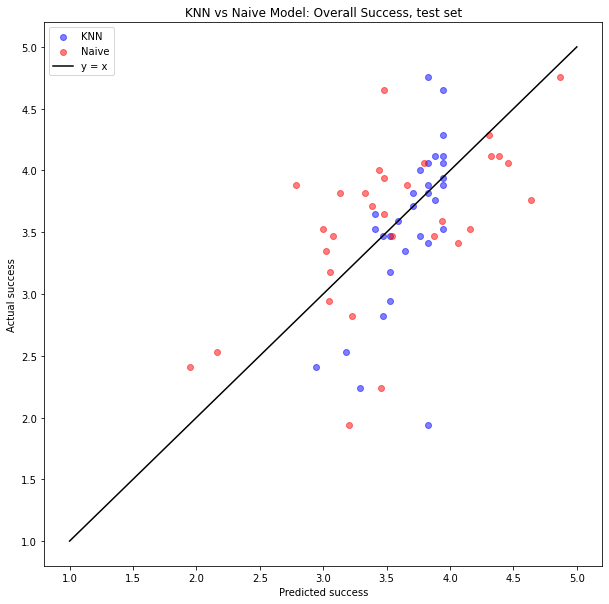

In [12]:
from matplotlib import pyplot as plt

# Plot the results, with a line of y = x for reference.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title("KNN vs Naive Model: Overall Success, test set")
ax.set_xlabel("Predicted success")
ax.set_ylabel("Actual success")
i = 17
ax.scatter(
    np.array(knn_predictions)[:, i],
    trainer.test_y[:, i],
    label="KNN",
    color="blue",
    alpha=0.5,
)
ax.scatter(
    np.array(naive_predictions)[:, i],
    trainer.test_y[:, i],
    label="Naive",
    color="red",
    alpha=0.5,
)

x = np.linspace(1, 5, 100)
ax.plot(x, x, color="black", label="y = x")
ax.legend()
plt.show()